# Case Study 3: Analysis of Classification Data

** In this example of data mining for knowledge discovery we consider a classification problem with a large number of objects to be classified based on many attributes. A set of 40 characters or attributes are measured on 5500 items which belong to 11 different categories of varied textures. Textures include a grass lawn, pressed calf leather, handmade paper, cotton canvas, etc. All of the attributes are measured on a continuous scale. **

** Objective of Analysis: **
Pattern recognition and Classification of 5500 objects into 11 classes based on 40 attributes

** The dataset is available at https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/Texture.zip **

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the Data

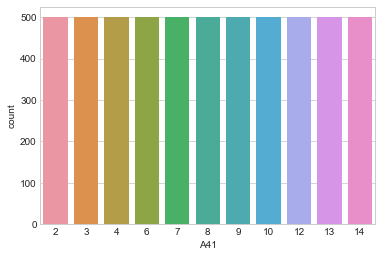

In [143]:
df = pd.read_csv('03 classification.csv',sep=',')
sns.countplot(df['A41'])

# Exploratory Data Analysis (EDA) and Data Pre-processing

** There are 40 predictors in the data. Univariate descriptive statistics and the box-plots are shown below **

In [144]:
df.drop('A41',axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A1,5500.0,-1.098305,0.203403,-1.450,-1.21800,-1.1490,-1.04400,0.774
A2,5500.0,-0.586687,0.205537,-1.200,-0.71225,-0.5620,-0.45600,0.330
A3,5500.0,-0.583850,0.313495,-1.310,-0.77125,-0.5300,-0.35200,0.344
A4,5500.0,-0.404649,0.230204,-1.110,-0.53500,-0.3720,-0.25800,0.588
A5,5500.0,-0.330660,0.235960,-1.053,-0.48025,-0.2720,-0.16400,0.439
A6,5500.0,-0.242159,0.222505,-1.003,-0.34500,-0.1840,-0.08300,0.452
A7,5500.0,-0.602652,0.200269,-1.208,-0.72000,-0.5800,-0.48100,0.525
A8,5500.0,-0.432157,0.221036,-1.080,-0.58400,-0.3800,-0.28000,0.398
A9,5500.0,-0.331710,0.236053,-1.057,-0.48400,-0.2720,-0.16300,0.437
A10,5500.0,-0.597805,0.326766,-1.258,-0.82800,-0.5600,-0.34300,0.355


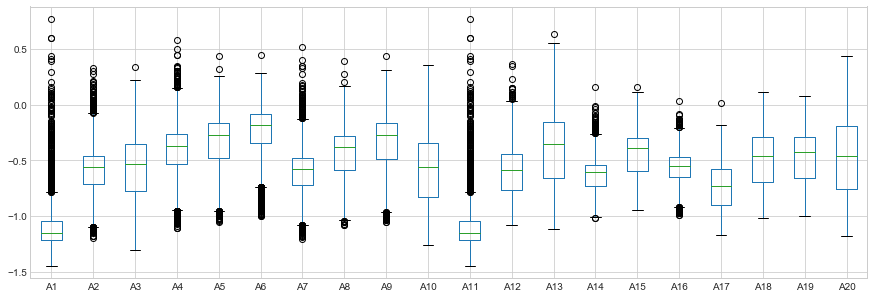

In [145]:
df[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10',
    'A11','A12','A13','A14','A15','A16','A17','A18','A19','A20']].boxplot(figsize=(15,5))

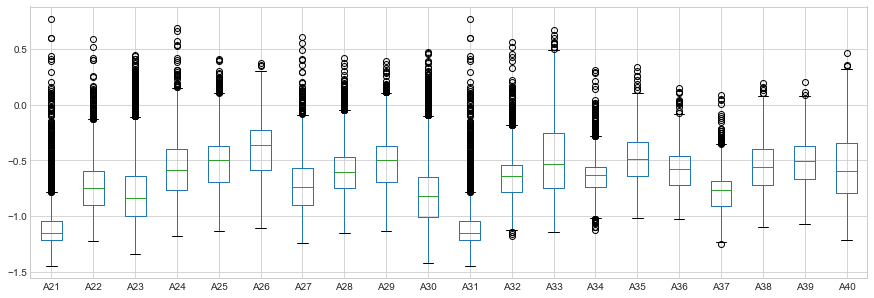

In [146]:
df[['A21','A22','A23','A24','A25','A26','A27','A28','A29','A30',
    'A31','A32','A33','A34','A35','A36','A37','A38','A39','A40']].boxplot(figsize=(15,5))

** From the above univariate exercises, it is clear that several of the 40 attributes have outliers of varied proportion. In order to include as many rows as possible, but eliminating the extreme outliers, all data points (rows) were included, which do not contain any outlier value in any of the 40 predictors. **

In [147]:
df = df[np.abs(df['A1']-df['A1'].mean())<=(3*df['A1'].std())].copy()
df = df[np.abs(df['A2']-df['A2'].mean())<=(3*df['A2'].std())].copy()
df = df[np.abs(df['A3']-df['A3'].mean())<=(3*df['A3'].std())].copy()
df = df[np.abs(df['A4']-df['A4'].mean())<=(3*df['A4'].std())].copy()
df = df[np.abs(df['A5']-df['A5'].mean())<=(3*df['A5'].std())].copy()
df = df[np.abs(df['A6']-df['A6'].mean())<=(3*df['A6'].std())].copy()
df = df[np.abs(df['A7']-df['A7'].mean())<=(3*df['A7'].std())].copy()
df = df[np.abs(df['A8']-df['A8'].mean())<=(3*df['A8'].std())].copy()
df = df[np.abs(df['A9']-df['A9'].mean())<=(3*df['A9'].std())].copy()
df = df[np.abs(df['A10']-df['A10'].mean())<=(3*df['A10'].std())].copy()
df = df[np.abs(df['A11']-df['A11'].mean())<=(3*df['A11'].std())].copy()
df = df[np.abs(df['A12']-df['A12'].mean())<=(3*df['A12'].std())].copy()
df = df[np.abs(df['A13']-df['A13'].mean())<=(3*df['A13'].std())].copy()
df = df[np.abs(df['A14']-df['A14'].mean())<=(3*df['A14'].std())].copy()
df = df[np.abs(df['A15']-df['A15'].mean())<=(3*df['A15'].std())].copy()
df = df[np.abs(df['A16']-df['A16'].mean())<=(3*df['A16'].std())].copy()
df = df[np.abs(df['A17']-df['A17'].mean())<=(3*df['A17'].std())].copy()
df = df[np.abs(df['A18']-df['A18'].mean())<=(3*df['A18'].std())].copy()
df = df[np.abs(df['A19']-df['A19'].mean())<=(3*df['A19'].std())].copy()
df = df[np.abs(df['A20']-df['A20'].mean())<=(3*df['A20'].std())].copy()
df = df[np.abs(df['A21']-df['A21'].mean())<=(3*df['A21'].std())].copy()
df = df[np.abs(df['A22']-df['A22'].mean())<=(3*df['A22'].std())].copy()
df = df[np.abs(df['A23']-df['A23'].mean())<=(3*df['A23'].std())].copy()
df = df[np.abs(df['A24']-df['A24'].mean())<=(3*df['A24'].std())].copy()
df = df[np.abs(df['A25']-df['A25'].mean())<=(3*df['A25'].std())].copy()
df = df[np.abs(df['A26']-df['A26'].mean())<=(3*df['A26'].std())].copy()
df = df[np.abs(df['A27']-df['A27'].mean())<=(3*df['A27'].std())].copy()
df = df[np.abs(df['A28']-df['A28'].mean())<=(3*df['A28'].std())].copy()
df = df[np.abs(df['A29']-df['A29'].mean())<=(3*df['A29'].std())].copy()
df = df[np.abs(df['A30']-df['A30'].mean())<=(3*df['A30'].std())].copy()
df = df[np.abs(df['A31']-df['A31'].mean())<=(3*df['A31'].std())].copy()
df = df[np.abs(df['A32']-df['A32'].mean())<=(3*df['A32'].std())].copy()
df = df[np.abs(df['A33']-df['A33'].mean())<=(3*df['A33'].std())].copy()
df = df[np.abs(df['A34']-df['A34'].mean())<=(3*df['A34'].std())].copy()
df = df[np.abs(df['A35']-df['A35'].mean())<=(3*df['A35'].std())].copy()
df = df[np.abs(df['A36']-df['A36'].mean())<=(3*df['A36'].std())].copy()
df = df[np.abs(df['A37']-df['A37'].mean())<=(3*df['A37'].std())].copy()
df = df[np.abs(df['A38']-df['A38'].mean())<=(3*df['A38'].std())].copy()
df = df[np.abs(df['A39']-df['A39'].mean())<=(3*df['A39'].std())].copy()
df = df[np.abs(df['A40']-df['A40'].mean())<=(3*df['A40'].std())].copy()

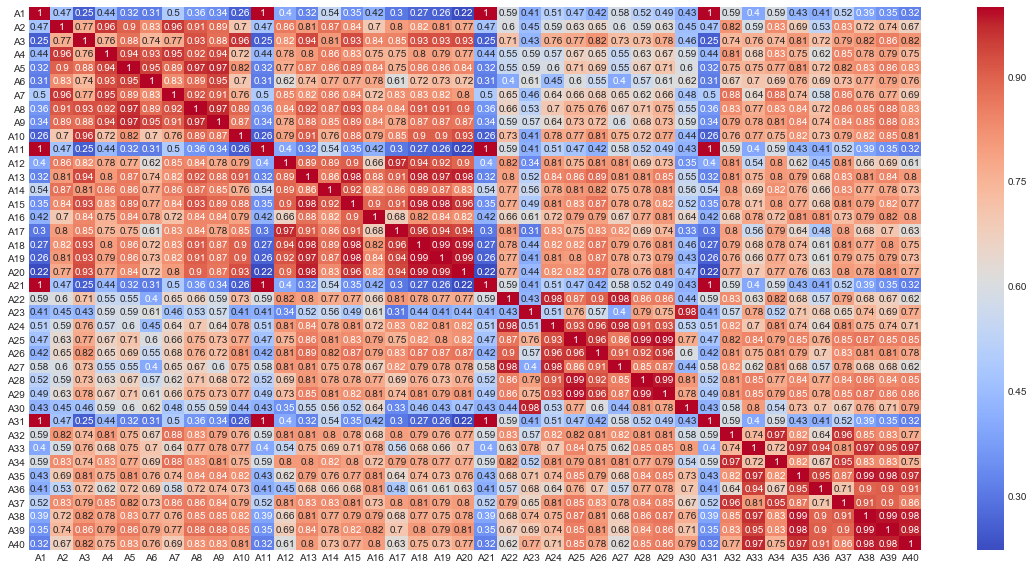

In [148]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop('A41',axis=1).corr(),cmap='coolwarm',annot=True)

In [149]:
y = df['A41'].copy() 
x = df.drop('A41',axis=1).copy()

# Principal Components Analysis

** With such a high degree of dependency it is recommended that a PCA is done on the data and only the top few components are used for classification **

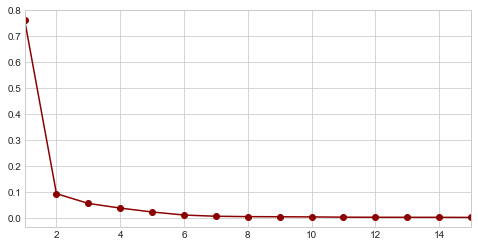

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(x)

x_chart = range(1,16)
y_chart = pca.explained_variance_ratio_
pd.Series(y_chart, x_chart).plot(color="darkred",marker="o",figsize=(8,4))

In [151]:
pca = PCA(n_components=7)
pca.fit(x)
x_pca = pca.transform(x)

# 10-Fold Cross-validation

** Since data set is large enough, 10-fold cross-validation is applied to evaluate model performance. After removing the outliers remaining observations are included in the master data and the first 6 principal components are used for prediction. For each observation (row) a score corresponding to each PC is computed and this is the value of the predictors (PCs) used to evaluate model performance.**

** Data is divided into 10 sets randomly of which 9 sets have 499 observations and the last set has 500 observations. Training data is formed by taking 9 sets at a time and leave one set out as the Test data. Hence 10 different combinations of Training and Test sets are formed. On each of Training and Test pair a technique is applied and evaluated. Final evaluation of the technique is determined by the average mis-classification probability over the 10 Test sets.**

In [152]:
final_data = pd.concat([y.reset_index().drop('index',axis=1),pd.DataFrame(x_pca)],axis=1)
final_data

xtrain0 = final_data.drop(final_data.index[0:499])
xtrain1 = final_data.drop(final_data.index[499:998])
xtrain2 = final_data.drop(final_data.index[998:1497])
xtrain3 = final_data.drop(final_data.index[1497:1996])
xtrain4 = final_data.drop(final_data.index[1996:2495])
xtrain5 = final_data.drop(final_data.index[2495:2994])
xtrain6 = final_data.drop(final_data.index[2994:3493])
xtrain7 = final_data.drop(final_data.index[3493:3992])
xtrain8 = final_data.drop(final_data.index[3992:4491])
xtrain9 = final_data.drop(final_data.index[4491:4991])

xtest0 = final_data.iloc[0:499]
xtest1 = final_data.iloc[499:998]
xtest2 = final_data.iloc[998:1497]
xtest3 = final_data.iloc[1497:1996]
xtest4 = final_data.iloc[1996:2495]
xtest5 = final_data.iloc[2495:2994]
xtest6 = final_data.iloc[2994:3493]
xtest7 = final_data.iloc[3493:3992]
xtest8 = final_data.iloc[3992:4491]
xtest9 = final_data.iloc[4491:4991]

# K Nearest Neighbour

* k = 5

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
x_chart = range(0,10)
y_chart = []

y_test = xtest0['A41'].copy() 
y_train = xtrain0['A41'].copy() 
x_test = xtest0.drop('A41',axis=1).copy()
x_train = xtrain0.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest1['A41'].copy() 
y_train = xtrain1['A41'].copy() 
x_test = xtest1.drop('A41',axis=1).copy()
x_train = xtrain1.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest2['A41'].copy() 
y_train = xtrain2['A41'].copy() 
x_test = xtest2.drop('A41',axis=1).copy()
x_train = xtrain2.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest3['A41'].copy() 
y_train = xtrain3['A41'].copy() 
x_test = xtest3.drop('A41',axis=1).copy()
x_train = xtrain3.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest4['A41'].copy() 
y_train = xtrain4['A41'].copy() 
x_test = xtest4.drop('A41',axis=1).copy()
x_train = xtrain4.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest5['A41'].copy() 
y_train = xtrain5['A41'].copy() 
x_test = xtest5.drop('A41',axis=1).copy()
x_train = xtrain5.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest6['A41'].copy() 
y_train = xtrain6['A41'].copy() 
x_test = xtest6.drop('A41',axis=1).copy()
x_train = xtrain6.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest7['A41'].copy() 
y_train = xtrain7['A41'].copy() 
x_test = xtest7.drop('A41',axis=1).copy()
x_train = xtrain7.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest8['A41'].copy() 
y_train = xtrain8['A41'].copy() 
x_test = xtest8.drop('A41',axis=1).copy()
x_train = xtrain8.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest9['A41'].copy() 
y_train = xtrain9['A41'].copy() 
x_test = xtest9.drop('A41',axis=1).copy()
x_train = xtrain9.drop('A41',axis=1).copy()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

print("Overall error rate: ",round(np.mean(y_chart)*100,2),"%")

Overall error rate:  2.72 %


# Decision Tree

* max_depth_options = 9
* max_features_options = None
* min_samples_leaf_options = 15

In [169]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=9, random_state=101, max_features = None, min_samples_leaf = 15)
x_chart = range(0,10)
y_chart = []

y_test = xtest0['A41'].copy() 
y_train = xtrain0['A41'].copy() 
x_test = xtest0.drop('A41',axis=1).copy()
x_train = xtrain0.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest1['A41'].copy() 
y_train = xtrain1['A41'].copy() 
x_test = xtest1.drop('A41',axis=1).copy()
x_train = xtrain1.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest2['A41'].copy() 
y_train = xtrain2['A41'].copy() 
x_test = xtest2.drop('A41',axis=1).copy()
x_train = xtrain2.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest3['A41'].copy() 
y_train = xtrain3['A41'].copy() 
x_test = xtest3.drop('A41',axis=1).copy()
x_train = xtrain3.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest4['A41'].copy() 
y_train = xtrain4['A41'].copy() 
x_test = xtest4.drop('A41',axis=1).copy()
x_train = xtrain4.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest5['A41'].copy() 
y_train = xtrain5['A41'].copy() 
x_test = xtest5.drop('A41',axis=1).copy()
x_train = xtrain5.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest6['A41'].copy() 
y_train = xtrain6['A41'].copy() 
x_test = xtest6.drop('A41',axis=1).copy()
x_train = xtrain6.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest7['A41'].copy() 
y_train = xtrain7['A41'].copy() 
x_test = xtest7.drop('A41',axis=1).copy()
x_train = xtrain7.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest8['A41'].copy() 
y_train = xtrain8['A41'].copy() 
x_test = xtest8.drop('A41',axis=1).copy()
x_train = xtrain8.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest9['A41'].copy() 
y_train = xtrain9['A41'].copy() 
x_test = xtest9.drop('A41',axis=1).copy()
x_train = xtrain9.drop('A41',axis=1).copy()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

print("Overall error rate: ",round(np.mean(y_chart)*100,2),"%")

Overall error rate:  11.84 %


# Random Forest

* n_estimaor_options = 100

In [173]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, oob_score=True, n_jobs=-1, random_state=101)
x_chart = range(0,10)
y_chart = []

y_test = xtest0['A41'].copy() 
y_train = xtrain0['A41'].copy() 
x_test = xtest0.drop('A41',axis=1).copy()
x_train = xtrain0.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest1['A41'].copy() 
y_train = xtrain1['A41'].copy() 
x_test = xtest1.drop('A41',axis=1).copy()
x_train = xtrain1.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest2['A41'].copy() 
y_train = xtrain2['A41'].copy() 
x_test = xtest2.drop('A41',axis=1).copy()
x_train = xtrain2.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest3['A41'].copy() 
y_train = xtrain3['A41'].copy() 
x_test = xtest3.drop('A41',axis=1).copy()
x_train = xtrain3.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest4['A41'].copy() 
y_train = xtrain4['A41'].copy() 
x_test = xtest4.drop('A41',axis=1).copy()
x_train = xtrain4.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest5['A41'].copy() 
y_train = xtrain5['A41'].copy() 
x_test = xtest5.drop('A41',axis=1).copy()
x_train = xtrain5.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest6['A41'].copy() 
y_train = xtrain6['A41'].copy() 
x_test = xtest6.drop('A41',axis=1).copy()
x_train = xtrain6.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest7['A41'].copy() 
y_train = xtrain7['A41'].copy() 
x_test = xtest7.drop('A41',axis=1).copy()
x_train = xtrain7.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest8['A41'].copy() 
y_train = xtrain8['A41'].copy() 
x_test = xtest8.drop('A41',axis=1).copy()
x_train = xtrain8.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

y_test = xtest9['A41'].copy() 
y_train = xtrain9['A41'].copy() 
x_test = xtest9.drop('A41',axis=1).copy()
x_train = xtrain9.drop('A41',axis=1).copy()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_chart.append(np.mean(y_pred != y_test))

print("Overall error rate: ",round(np.mean(y_chart)*100,2),"%")

Overall error rate:  3.23 %


# Conclusion

**Overall error rate: **
* K Nearest Neighbour: 2.72 %
* Decision Tree: 11.84 %
* Random Forest: 3.23 %